In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
df = pd.read_csv('/kaggle/input/thyroid-disease-unsupervised-anomaly-detection/annthyroid_unsupervised_anomaly_detection.csv', delimiter= ';')

df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label,Unnamed: 22,Unnamed: 23
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,61.00000,6.0000,23.0,87.0,26.0,o,NaN,NaN
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.00000,15.0000,61.0,96.0,64.0,o,NaN,NaN
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,29.00000,19.0000,58.0,103.0,56.0,o,NaN,NaN
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,114.00000,3.0000,24.0,61.0,39.0,o,NaN,NaN
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.00000,3.0000,5.0,116.0,4.0,o,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00047,8.0000,154.0,75.0,204.0,n,NaN,NaN
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00006,0.0206,125.0,107.0,117.0,n,NaN,NaN
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00130,25.0000,125.0,114.0,109.0,n,NaN,NaN
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00078,0.0206,106.0,88.0,121.0,n,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        6916 non-null   float64
 1   Sex                        6916 non-null   float64
 2   on_thyroxine               6916 non-null   float64
 3   query_on_thyroxine         6916 non-null   float64
 4   on_antithyroid_medication  6916 non-null   float64
 5   sick                       6916 non-null   float64
 6   pregnant                   6916 non-null   float64
 7   thyroid_surgery            6916 non-null   float64
 8   I131_treatment             6916 non-null   float64
 9   query_hypothyroid          6916 non-null   float64
 10  query_hyperthyroid         6916 non-null   float64
 11  lithium                    6916 non-null   float64
 12  goitre                     6916 non-null   float64
 13  tumor                      6916 non-null   float

In [4]:
df.drop(['Unnamed: 22', 'Unnamed: 23'], axis= 1, inplace= True)

df

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,61.00000,6.0000,23.0,87.0,26.0,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.00000,15.0000,61.0,96.0,64.0,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,29.00000,19.0000,58.0,103.0,56.0,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,114.00000,3.0000,24.0,61.0,39.0,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,49.00000,3.0000,5.0,116.0,4.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,8.0000,154.0,75.0,204.0,n
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,125.0,107.0,117.0,n
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,25.0000,125.0,114.0,109.0,n
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,106.0,88.0,121.0,n


In [5]:
df.columns

Index(['Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3_measured',
       'TT4_measured', 'T4U_measured', 'FTI_measured', 'Outlier_label '],
      dtype='object')

In [6]:
df = df.rename({'Outlier_label ': 'Outlier_label'}, axis=1)

In [7]:
df['Outlier_label'] = df['Outlier_label'].map({'n': 0, 'o': 1})

df['Outlier_label']

0       1
1       1
2       1
3       1
4       1
       ..
6911    0
6912    0
6913    0
6914    0
6915    0
Name: Outlier_label, Length: 6916, dtype: int64

In [8]:
df['Outlier_label'].value_counts()/len(df)

Outlier_label
0    0.963852
1    0.036148
Name: count, dtype: float64

In [9]:
df.isnull().sum()

Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
Outlier_label                0
dtype: int64

In [10]:
x = df.drop('Outlier_label', axis=1)
y = df['Outlier_label']

x

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,61.00000,6.0000,23.0,87.0,26.0
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.00000,15.0000,61.0,96.0,64.0
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,29.00000,19.0000,58.0,103.0,56.0
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,114.00000,3.0000,24.0,61.0,39.0
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49.00000,3.0000,5.0,116.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00047,8.0000,154.0,75.0,204.0
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00006,0.0206,125.0,107.0,117.0
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00130,25.0000,125.0,114.0,109.0
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00078,0.0206,106.0,88.0,121.0


<Axes: >

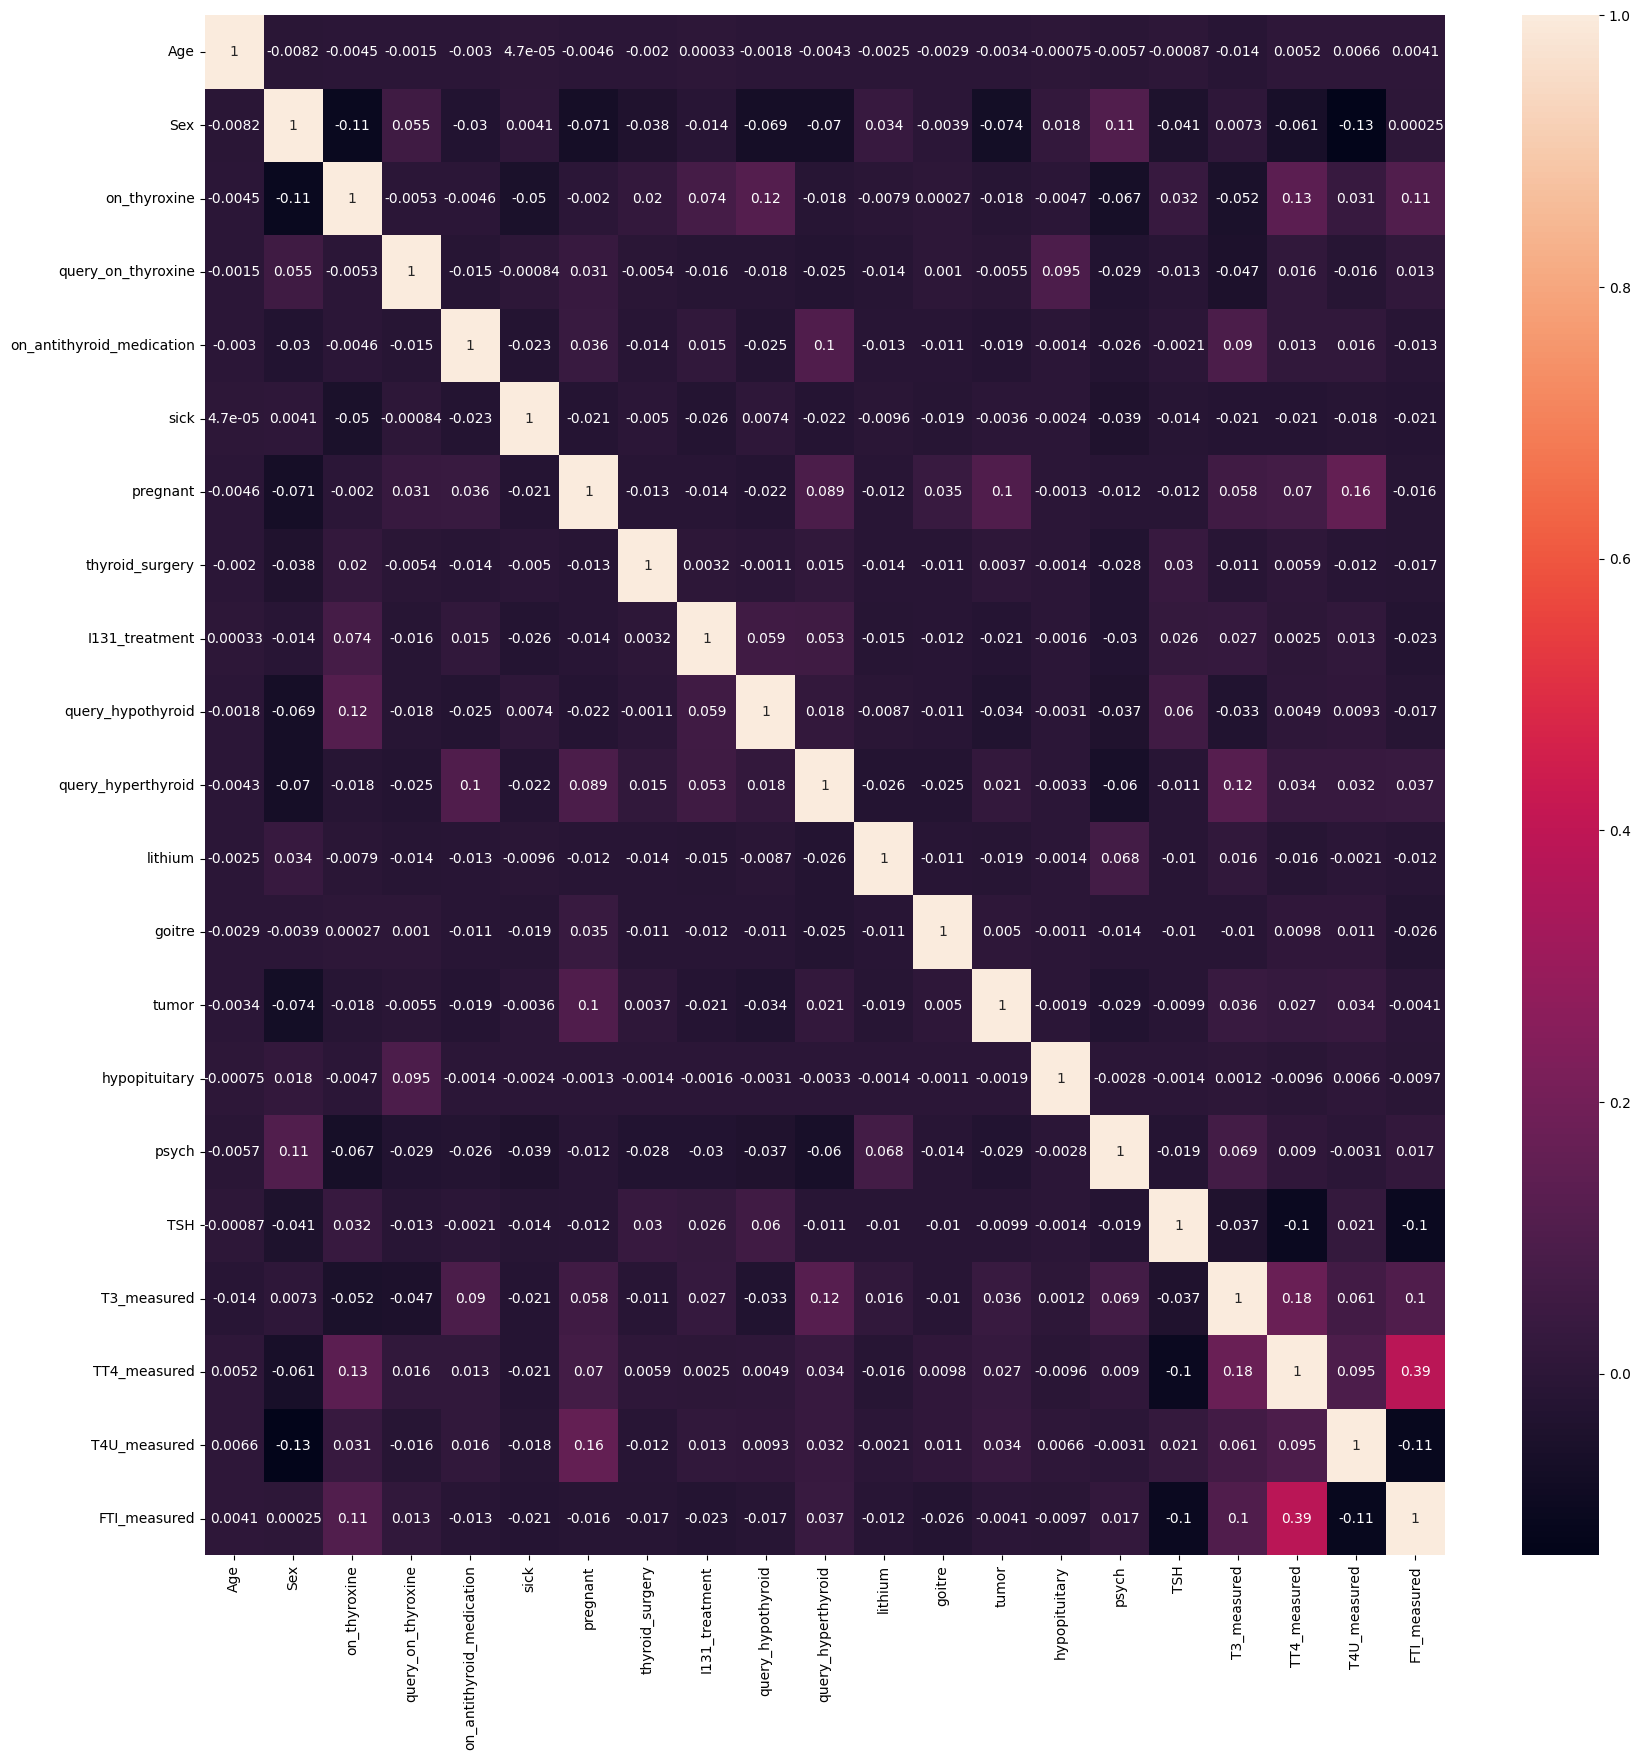

In [11]:
plt.figure(figsize= (20, 20))
sns.heatmap(x.corr(), annot= True)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=42)

In [13]:
dt = DecisionTreeClassifier(max_depth= 3)
clf = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

accuracy_score(y_pred, y_test)

0.9846692947875603

In [14]:
knc = KNeighborsClassifier(n_neighbors= 3)

clf = knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)

accuracy_score(y_pred, y_test)

0.9636443276390714

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier

xgb = XGBClassifier()
params = {'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.001, 0.01, 0.1, 0.5],
        'eval_metric': ['logloss', 'auc']}

grid = GridSearchCV(xgb, params, cv= 4)

model = grid.fit(x_train, y_train)

print(model.best_params_)
print(model.best_score_)

y_pred = model.predict(x_test)
print("Accuracy score:", accuracy_score(y_pred, y_test))

{'eval_metric': 'logloss', 'learning_rate': 0.1, 'n_estimators': 50}
0.9952519219564242
Accuracy score: 0.9956197985107315
